### NAME : SAHEED TAIWO YUSUF
### STUDENT NUMBER : 202121964

#### FEATURE ENGINEERING, VISUALIZATION, CLUSTERING AND CLASSIFICTION MODEL FOR IOS DATASET

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib import pyplot
import seaborn as sbn
import seaborn as sbn
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier
import plotly.express as px

In [2]:
pd. set_option("display.max_columns", None) 

In [3]:
df = pd.read_csv('./ios-fitness-and-medical-cleaned-data.csv')

#### Feature Engineering

##### Method to create a new column that determines if an app support English Language

In [4]:
def is_english_supported(language):
    return language.find('English') >=0

##### Method to create a new column that determines if an app is free or paid based on download cost

In [5]:
def determine_if_app_is_free_or_not(price):
    if (price > 0):
        return 'PAID'
    return 'FREE'

- 1-49 : FAIR
- 50 - 99 : GOOD
- 100 - 500 : VERY GOOD
- 501+ : EXCELLENT

##### Method to create a new column for application performance based on rating


In [6]:
def grade_app_with_rating2(app_rating, rating_count):
    if ((app_rating >=0) and (app_rating <2.5)):
        return 'BAD'
    if ((app_rating >=2.5) and (app_rating <3.0)):
        return 'FAIR'
    if ((app_rating >=3.0) and (app_rating <4.0)):
        if rating_count < 50:
            return 'FAIR'
        return 'GOOD'
    if ((app_rating >=4.0) and (app_rating <4.5)):
        if rating_count < 50:
            return 'FAIR'
        elif rating_count >=50 and rating_count <100:
            return 'GOOD' 
        else:
            return 'VERY GOOD'
    if (app_rating >=4.5):
        if rating_count < 50:
            return 'FAIR'
        elif rating_count >=50 and rating_count <100:
            return 'GOOD'
        elif rating_count >=100 and rating_count < 500:
            return 'VERY GOOD'
        else:
            return 'EXCELLENT'

##### Method to create category for rating count based on rating count

In [7]:
def create_rating_count_range(rating_count):
    if (rating_count >=1 and rating_count<5):
        return '1+'
    if (rating_count >=5 and rating_count<10):
        return '5+'
    if (rating_count >=10 and rating_count<50):
        return '10+'
    if (rating_count >=50 and rating_count<100):
        return '50+'
    if (rating_count >=100 and rating_count<500):
        return '100+'
    if (rating_count >=500 and rating_count<1000):
        return '500+'
    if (rating_count >=1000 and rating_count<5000):
        return '1,000+'
    if (rating_count >=5000 and rating_count<10000):
        return '5,000+'
    if (rating_count >=10000 and rating_count<50000):
        return '10,000+'
    if (rating_count >=50000 and rating_count<100000):
        return '50,000+'
    if (rating_count >=100000 and rating_count<500000):
        return '100,000+'
    if (rating_count >=500000 and rating_count<1000000):
        return '500,000+'
    if (rating_count >=1000000 and rating_count<5000000):
        return '1,000,000+'
    if (rating_count >=5000000 and rating_count<10000000):
        return '5,000,000+'
    if (rating_count >=10000000 and rating_count<50000000):
        return '10,000,000+'
    if (rating_count >=50000000 and rating_count<100000000):
        return '50,000,000+'
    return 0

##### Method to create a new column that group applications based on download price 

In [8]:
def create_price_category(rating_count):
    if (rating_count >0.0 and rating_count<1.0):
        return '0+'
    if (rating_count >=1 and rating_count<5):
        return '1+'
    if (rating_count >=5 and rating_count<10):
        return '5+'
    if (rating_count >=10 and rating_count<50):
        return '10+'
    if (rating_count >=50 and rating_count<100):
        return '50+'
    if (rating_count >=100 and rating_count<500):
        return '100+'
    if (rating_count >=500 and rating_count<1000):
        return '500+'
    return None

##### Method to create a new column that determine if app is available in multiple languages

In [9]:
def is_app_available_in_multiple_languages(languages):
    return len(languages.split(',')) > 1

##### Method to create a new column that determine if privacy data is collected

In [10]:
def is_privacy_data_collected(privacy_data):
    if pd.notna(privacy_data):
        return True
    return False

##### Method to create a new column that determine if app has ever been updated

In [11]:
def is_app_ever_updated(version_count):
    return version_count > 1

##### Method to create a new column that determine if app has been updated in 2022

In [12]:
def is_app_updated_in_2022(last_updated_date, released_date, versions_count):
    if (versions_count < 2):
        return False
    if (last_updated_date == released_date):
        return False
    if '2022' in last_updated_date:
        return True
    return False

##### Method that calls all other methods created above to perform feature engineering

In [13]:
def perform_feature_engineering(df):
    lang_na_indexes = df[df['Languages'].isna()].index
    df.loc[lang_na_indexes, 'Languages'] = 'Not Specified'
    df['is_english_supported'] = df['Languages'].apply(is_english_supported)
    df['Download Type'] = df['Price'].apply(determine_if_app_is_free_or_not)
#     df['App Grade'] = df['Average Rating'].apply(grade_app_with_rating)
    df['Rating Count Range'] = df['Rating Count'].apply(create_rating_count_range)
    df['is_available_in_multiple_langs'] = df['Languages'].apply(is_app_available_in_multiple_languages)
    df['is_privacy_data_collected'] = df['Privacy Data'].apply(is_privacy_data_collected)
    df['is_app_ever_updated'] = df['Number of Versions'].apply(is_app_ever_updated)
    df['Price Category'] = df['Price'].apply(create_price_category)
    for index in df.index:
        last_updated_date = df.at[index, 'Last Version Date']
        released_date = df.at[index, 'First Version Date']
        version = df.at[index, 'Number of Versions']
        rating_count = df.at[index, 'Rating Count']
        average_rating = df.at[index, 'Average Rating']
        df.at[index, 'is_updated_this_year'] = is_app_updated_in_2022(last_updated_date, released_date, version)
        df.at[index, 'App Grade'] = grade_app_with_rating2(average_rating, rating_count)

In [14]:
perform_feature_engineering(df)

#### VISUALIZATION

In [15]:
rating_count_range_order = [0, '1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', 
                            '100,000+', '500,000+', '1,000,000+']

In [16]:
price_range_order = ['0+', '1+', '5+', '10+', '50+', '100+', '500+']

In [17]:
app_grade_order = ['BAD', 'FAIR', 'GOOD', 'VERY GOOD', 'EXCELLENT']

#### Methods to draw histogram, countplot and set labels for plots


In [18]:
def draw_histogram(data, x_axis_title, height=5, aspect=1.6):
    sbn.displot(data, color = 'darkblue', kind='hist', height=5, aspect=1.6)
    pyplot.xlabel(x_axis_title)
    pyplot.ylabel('Density')

In [19]:
def draw_count_plot(data, x_column, x_label, y_label, fig_size=(8,6), order=None, hue=None):
    sbn.set(rc = {'figure.figsize':fig_size})
    sbn.countplot(data=data, x=x_column, order=order, color='#1C8BAD', hue=hue )
    pyplot.xlabel(x_label)
    pyplot.ylabel(y_label)
    pyplot.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
    pyplot.show()

In [20]:
def draw_count_plot_with_annot(data, x_column, x_label, y_label, fig_size=(8,6),annotCount=False, order=None, 
                               hue=None, palette=None):
    sbn.set(rc = {'figure.figsize':fig_size})
    sbndataplot = sbn.countplot(data=data, x=x_column, order=order, color='#1C8BAD', hue=hue, palette=palette)
    for p in sbndataplot.patches:
        if annotCount == True:
            height = p.get_height()
            if (pd.isna(height) == True):
                height = 0
            else:
                height = int(height)
            sbndataplot.annotate(height, 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        else:
            sbndataplot.annotate(format(p.get_height()/len(data)*100, '.2f')+'%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    pyplot.xlabel(x_label)
    pyplot.ylabel(y_label)
    pyplot.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
    pyplot.tight_layout(rect=(0, 0, 1, 1.4))
    pyplot.show()

In [21]:
def set_plot_labels(x_label, y_label, font_size):
    pyplot.xlabel(x_label)
    pyplot.ylabel(y_label)
    pyplot.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize=font_size)

#### Price influence

##### Application count based on price category

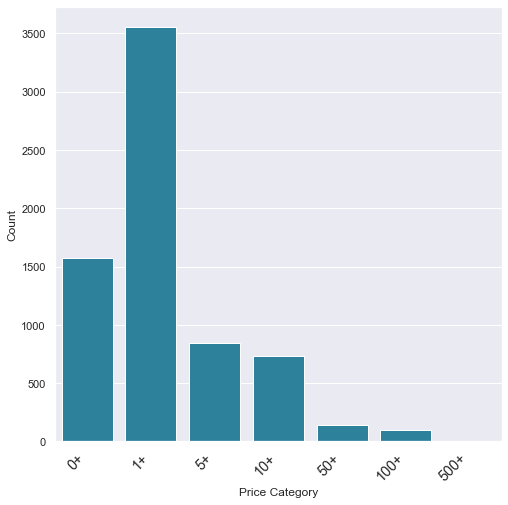

In [22]:
draw_count_plot(df, 'Price Category', 'Price Category', 'Count', fig_size=(8,8), 
               order=price_range_order)

##### Scatter plot showing relationship between price and average rating.


Text(0, 0.5, 'iOS Application Download Cost ($)')

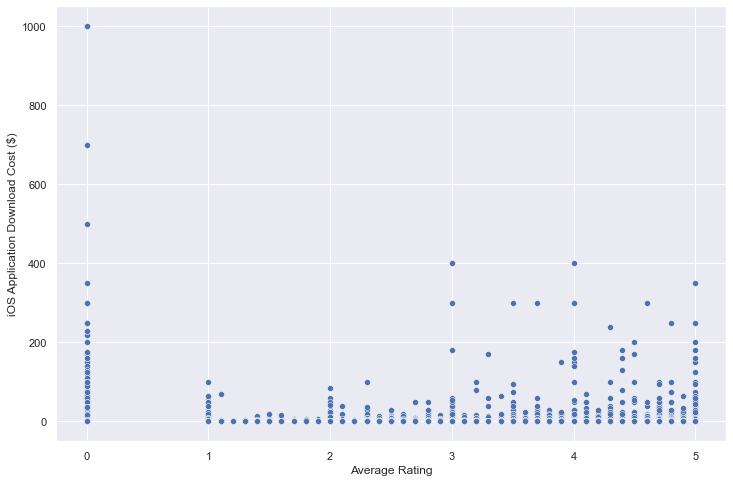

In [23]:
sbn.scatterplot(data=df, y='Price', x='Average Rating')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)
pyplot.xlabel("Average Rating")
pyplot.ylabel("iOS Application Download Cost ($)")

##### Scatter plot showing relationship between price and average rating, with indication of download type

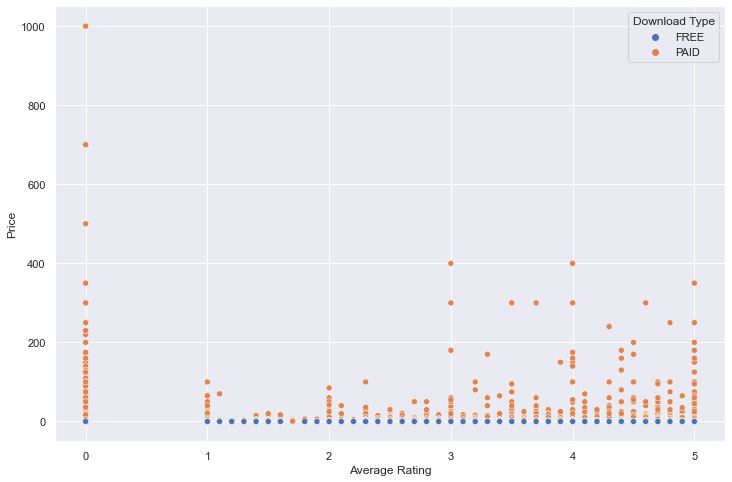

In [24]:
sbn.scatterplot(data=df, y='Price', x='Average Rating', hue='Download Type', legend='full')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)

In [25]:
paid_df = df[df['Download Type'] == 'PAID']

In [26]:
def draw_box_plot_for_download_price():
    a4_dims = (6, 6)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    bx = sbn.boxplot( data= paid_df, x = 'App Grade', y = 'Price')
    colors=['#CC0000','#336600', '#CCCC00', '#CC6600', '#eabada']
    color_dict = dict(zip(app_grade_order, colors))
    for i in range(0,4):
        mybox = bx.artists[i]
        mybox.set_facecolor(color_dict[app_grade_order[i]])
    pyplot.xlabel("iOS Application Performance")
    pyplot.ylabel("iOS Application Download Cost ($)")

##### Boxplot to show the price distribution for paid applications based on application performance

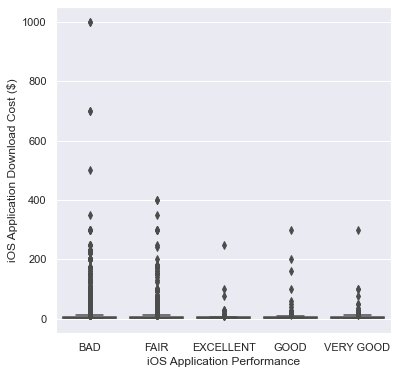

In [27]:
draw_box_plot_for_download_price()

In [28]:
paid_df.groupby('App Grade')['Price'].describe()

count       mean        std   min   25%   50%   75%     max
App Grade                                                              
BAD        3705.0  11.922524  40.863510  0.99  1.99  2.99  5.99  999.99
EXCELLENT   121.0   8.535455  25.078876  0.99  2.99  3.99  4.99  249.99
FAIR       2732.0   8.208887  24.059924  0.99  1.99  2.99  5.99  399.99
GOOD        178.0  10.091124  30.526656  0.99  1.99  3.99  5.99  299.99
VERY GOOD   212.0   8.494717  23.642379  0.99  1.99  3.99  5.99  299.99

In [29]:
df['Price'].describe()

count    93979.000000
mean         0.757930
std          9.689534
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        999.990000
Name: Price, dtype: float64

##### Bar plot showing Application performance based on application update

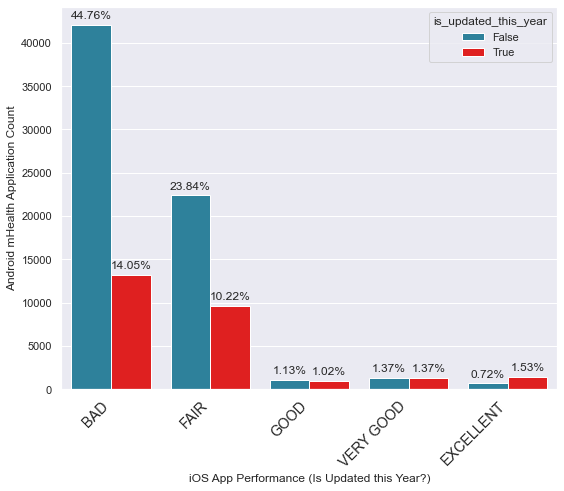

In [30]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS App Performance (Is Updated this Year?)',
                           'Android mHealth Application Count',hue= 'is_updated_this_year', fig_size=(8,5),
                           order=app_grade_order,
                           annotCount=False, palette=['#1C8BAD', 'red'])

##### Scatter Plot showing relationship between Price and Average Rating with indication of if app has been updated in 2022

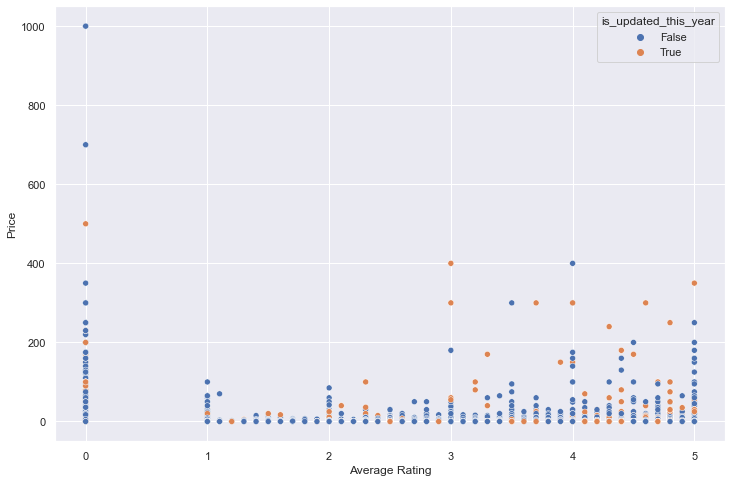

In [31]:
sbn.scatterplot(data=df, x='Average Rating', y='Price', hue='is_updated_this_year', legend='full')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)

##### Bar plot showing count of applications based on download type and if in-app purchase is supported

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


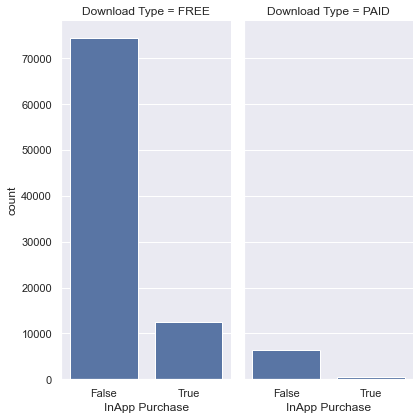

In [32]:
app_plot = sbn.FacetGrid(df, col="Download Type", col_wrap=2, height=6, aspect=0.5)
app_plot.map(sbn.countplot, "InApp Purchase")

##### Bar plot showing Application performance based on in-app purchase

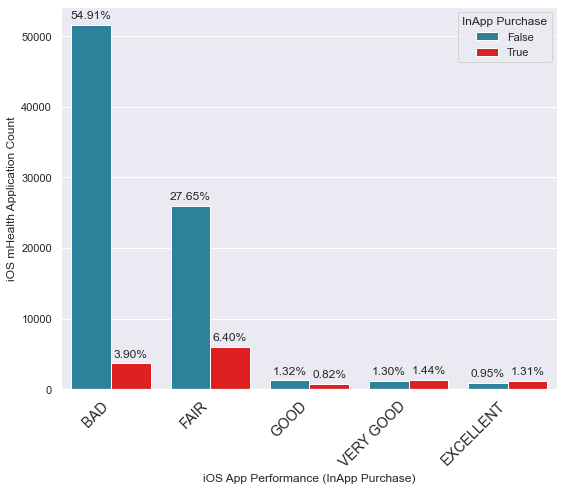

In [33]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS App Performance (InApp Purchase)',
                           'iOS mHealth Application Count',hue= 'InApp Purchase', fig_size=(8,5),
                           order=app_grade_order,
                           annotCount=False, palette=['#1C8BAD', 'red'])

##### Count plot showing distribution of download cost based on application performance


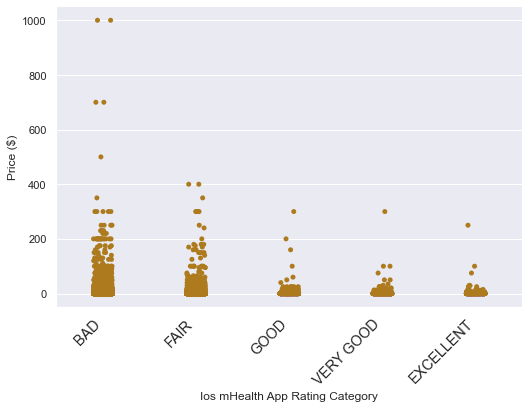

In [34]:
sbn.catplot(data=df, x='App Grade', y='Price',
            height=5, aspect=1.5, color="#AD7B1D", order=app_grade_order)
set_plot_labels('Ios mHealth App Rating Category', 'Price ($)', 'large')

##### Bar plot showing Application performance based on download type

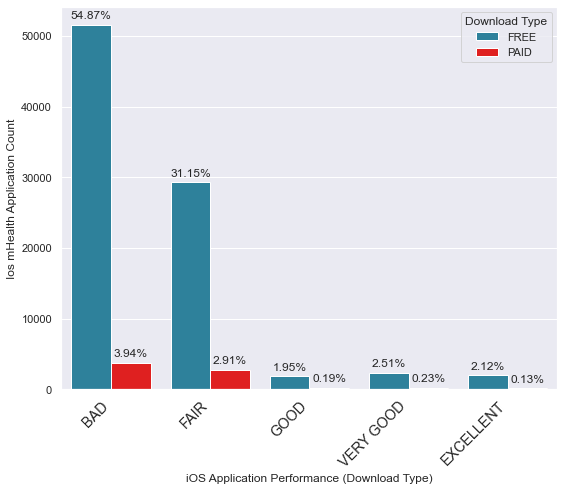

In [35]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS Application Performance (Download Type)',
                           'Ios mHealth Application Count',hue= 'Download Type', fig_size=(8,5), 
                           order=app_grade_order,
                           annotCount=False, palette=['#1C8BAD', 'red'])

#### Application Rating effect on the app?

##### Bar plot showing count based on application rating category


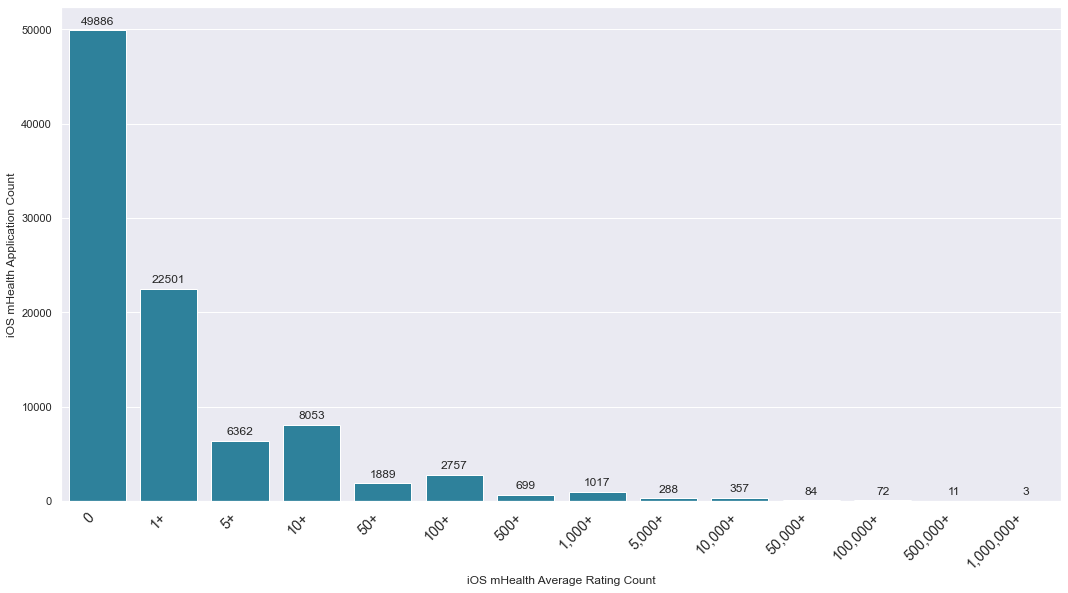

In [36]:
draw_count_plot_with_annot(df, 'Rating Count Range', 'iOS mHealth Average Rating Count', 
                           'iOS mHealth Application Count',fig_size=(15,6), annotCount=True,
                           order=rating_count_range_order)

##### Method to draw funnel chart

In [37]:
def draw_funnel_for_rating_count_range():
    counts = list()
    for rate_count_range in rating_count_range_order:
        count = len(df[df['Rating Count Range'] == rate_count_range])
        counts.append(count)
    fig = px.funnel_area(names=rating_count_range_order, values=counts)
    fig.show()

##### Chart showing count based on rating count category

In [38]:
draw_funnel_for_rating_count_range()

##### Bar plot showing count based on application rating category and download type


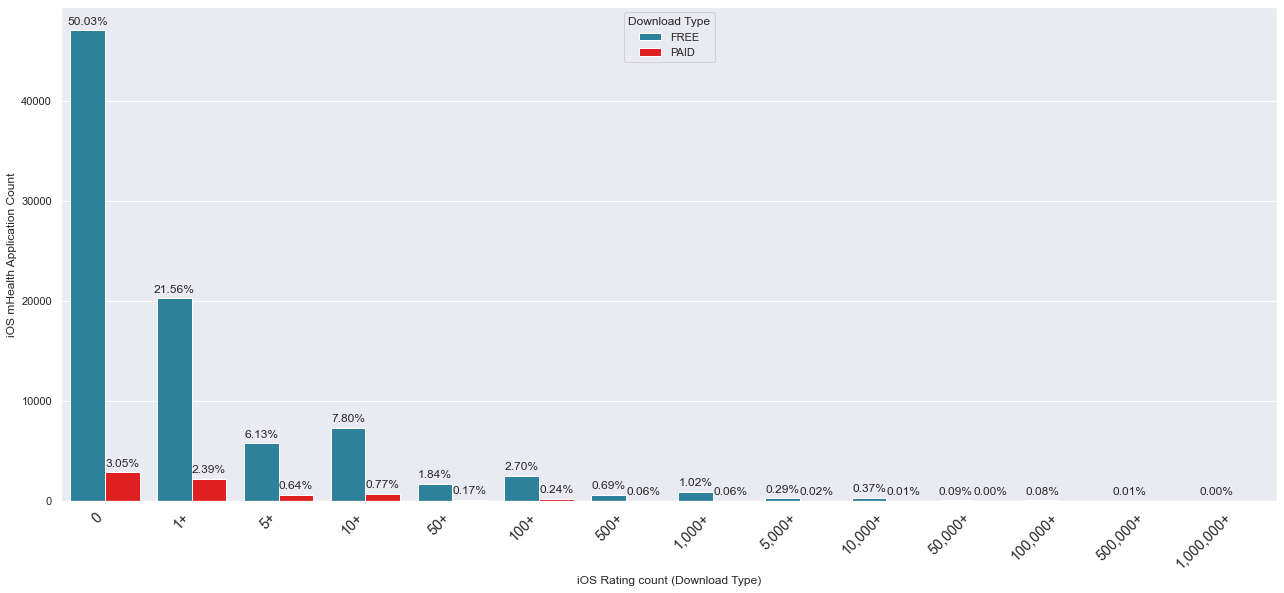

In [39]:
draw_count_plot_with_annot(df, 'Rating Count Range', 'iOS Rating count (Download Type)',
                           'iOS mHealth Application Count',hue= 'Download Type', fig_size=(18,6),
     order=rating_count_range_order, annotCount=False, palette=['#1C8BAD', 'red'])

##### Bar plot showing count based on application rating category and in-app purchase

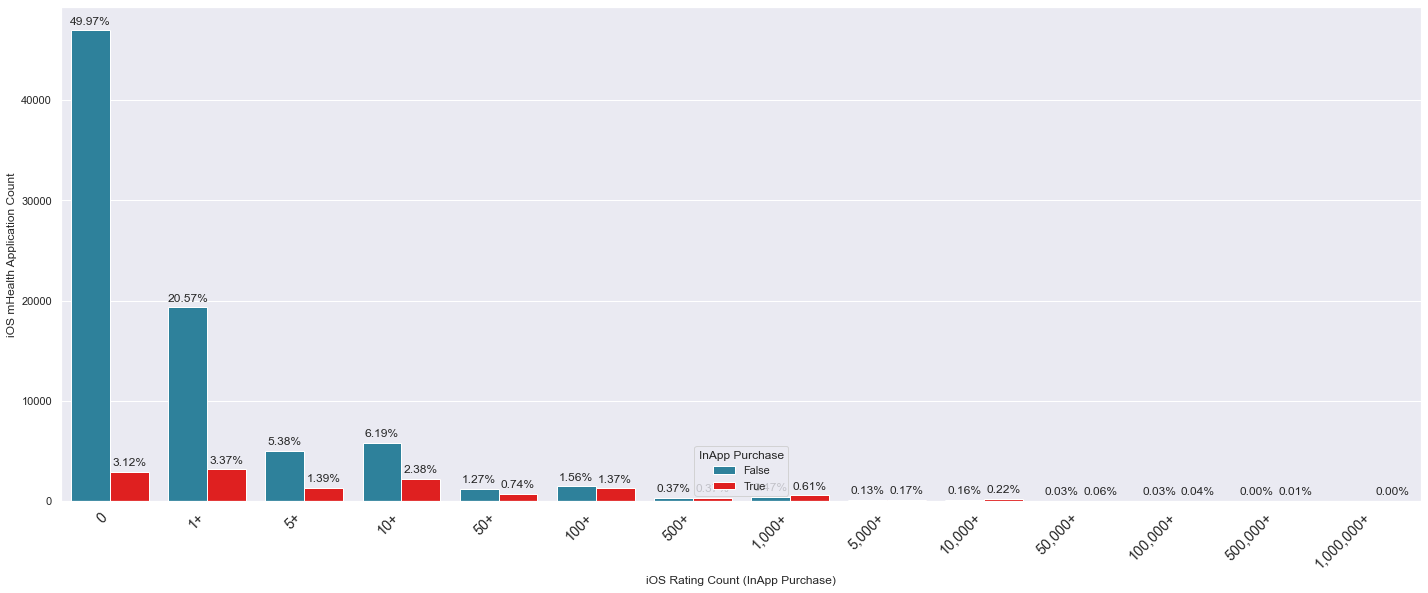

In [40]:
draw_count_plot_with_annot(df, 'Rating Count Range', 'iOS Rating Count (InApp Purchase)',
                           'iOS mHealth Application Count',hue= 'InApp Purchase', fig_size=(20,6), 
     order=rating_count_range_order, annotCount=False, palette=['#1C8BAD', 'red'])

##### Bar plot showing count based on application performance and multiple languages

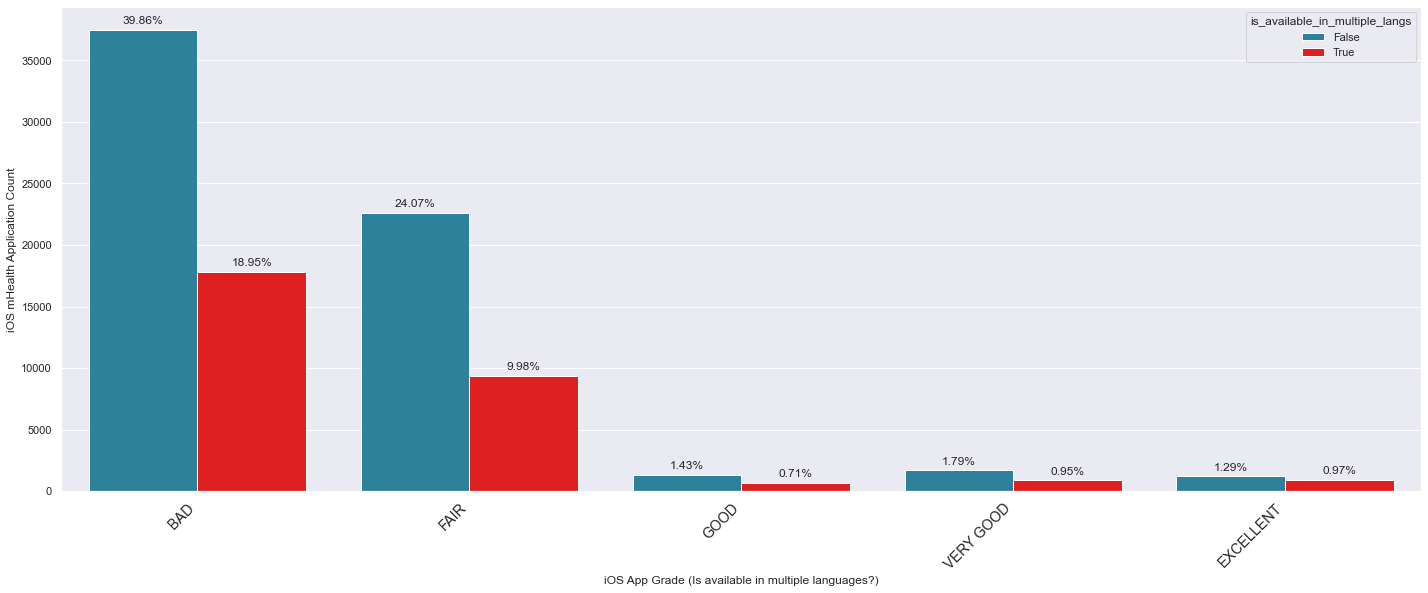

In [41]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS App Grade (Is available in multiple languages?)',
                           'iOS mHealth Application Count',hue= 'is_available_in_multiple_langs', fig_size=(20,6), 
     order=app_grade_order, annotCount=False, palette=['#1C8BAD', 'red'])

##### Bar plot showing count based on application performance and English supported

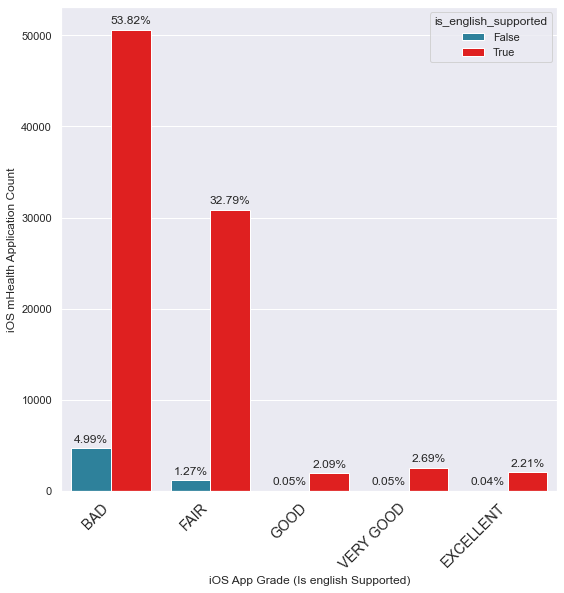

In [42]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS App Grade (Is english Supported)',
                           'iOS mHealth Application Count',hue= 'is_english_supported', fig_size=(8,6), 
     order=app_grade_order, annotCount=False, palette=['#1C8BAD', 'red'])

##### Scatter plot showing relationship between rating count and average rating

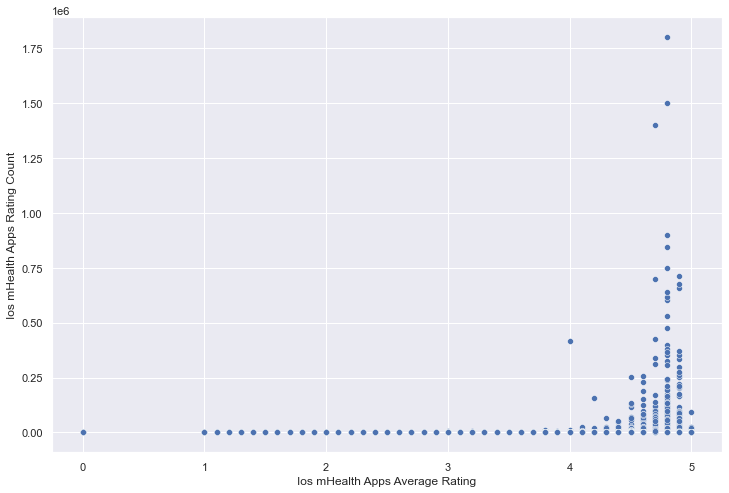

In [43]:
sbn.scatterplot(data=df, y='Rating Count', x='Average Rating')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)
pyplot.xlabel('Ios mHealth Apps Average Rating')
pyplot.ylabel('Ios mHealth Apps Rating Count')
pyplot.show()

#### Application Type 

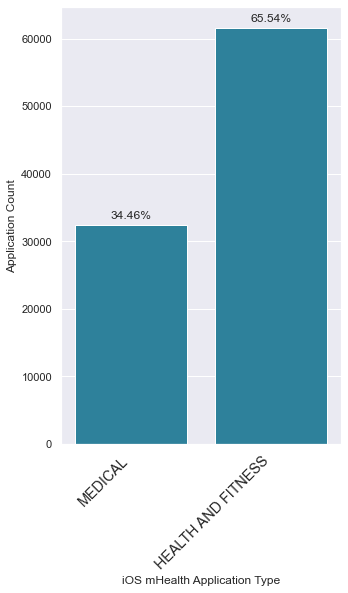

In [44]:
draw_count_plot_with_annot(df, 'App Type', 'iOS mHealth Application Type', 
                           'Application Count', fig_size=(5,6), annotCount=False)

##### Bar plot showing count based on application performance and mHealth app type

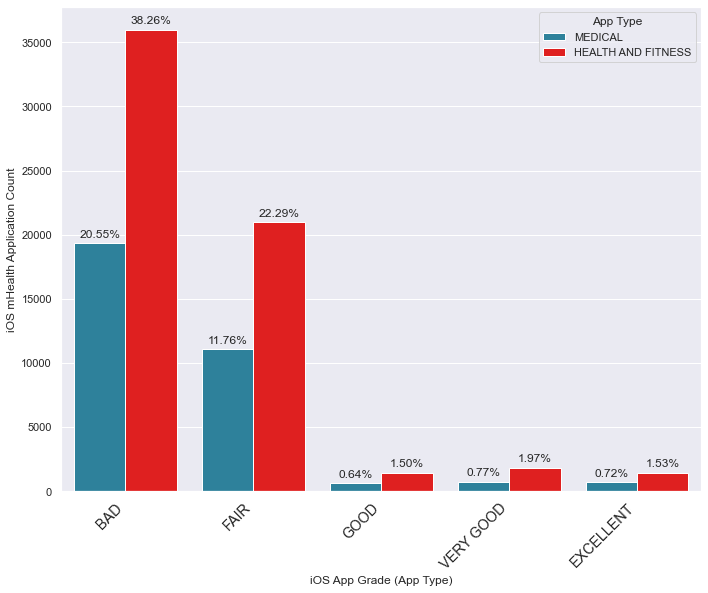

In [45]:
draw_count_plot_with_annot(df, 'App Grade', 'iOS App Grade (App Type)',
                           'iOS mHealth Application Count',hue= 'App Type', fig_size=(10,6), 
     order=app_grade_order, annotCount=False, palette=['#1C8BAD', 'red'])

##### Bar plot showing count of mHealth apps based on multiple languages

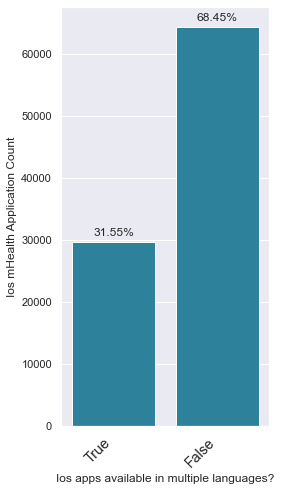

In [46]:
draw_count_plot_with_annot(df, 'is_available_in_multiple_langs', 'Ios apps available in multiple languages?',
                           'Ios mHealth Application Count',fig_size=(4,5),
                           annotCount=False, order=[True, False])

#### ASSOCIATION RULE MINING

##### Methods used to get consequents and antecedents to get relationship between features

In [47]:
def convert_consequent_to_str(consq):
    return str(consq).replace("frozenset({'", '').replace("})", '').replace("'", '')

In [48]:
def convert_antecedent_to_str(antecedent):
    antecedent = str(antecedent).replace("frozenset({'", '').replace("})", '').replace("'", '')
    return antecedent

In [49]:
def prepare_apriori_columns(df, column_list):
    apriori_df = list()
    for col in column_list:
        apriori_df.append(pd.get_dummies(df[col], prefix=col))
    apriori_df = pd.concat(apriori_df, axis=1)
    return apriori_df

def get_conditions_which_apps_are_most_likely_rated(min_support, min_threshold):
    apriori_df = prepare_apriori_columns(df,['Age Rating', 'InApp Purchase',
                                                       'App Grade', 'is_english_supported', 
                        'Download Type', 'is_available_in_multiple_langs', 'is_privacy_data_collected',
                                             'is_updated_this_year', 'Price Category'] )
    rules = apriori(apriori_df, min_support=min_support, use_colnames=True)
    association_rules_df = association_rules(rules, metric='confidence', min_threshold=min_threshold)
    association_rules_df["antecedent_len"] = association_rules_df["antecedents"].apply(lambda x: len(x))
    association_rules_df["consequents_len"] = association_rules_df["consequents"].apply(lambda x: len(x))
    association_rules_df['antecedents'] = association_rules_df['antecedents'].apply(convert_antecedent_to_str)
    association_rules_df['consequents'] = association_rules_df['consequents'].apply(convert_consequent_to_str)
    association_rules_df.sort_values(by=['confidence'], ascending=False, inplace=True)
    return association_rules_df[(association_rules_df['consequents_len']==1) & 
                                (association_rules_df['antecedent_len']>1)]

##### Print consequents and antecendents with minimum support of 0.5 and minimum treshold of 0.5

In [50]:
association_df = get_conditions_which_apps_are_most_likely_rated(0.5, 0.5)

In [51]:
def print_consequents_and_antecedents(df, consequent):
    filtered_df = df[df['consequents'].str.find(consequent) > -1]
    i = 1
    for index in filtered_df.index:
        if (i < 10):
            ants = filtered_df.at[index, 'antecedents']
            cons = filtered_df.at[index, 'consequents']
            support = filtered_df.at[index, 'support']
            conviction = filtered_df.at[index, 'conviction']
            confidence = filtered_df.at[index, 'confidence']
            print(f'{i}. {ants} => {cons} ({round(support,2), round(confidence,2), round(conviction,2)})')
            i = i + 1

In [52]:
print_consequents_and_antecedents(association_df,'Download Type')

1. App Grade_BAD, is_english_supported_True => Download Type_FREE ((0.5, 0.93, 1.08))
2. App Grade_BAD, InApp Purchase_False => Download Type_FREE ((0.51, 0.93, 1.07))
3. Age Rating_4+, is_english_supported_True => Download Type_FREE ((0.54, 0.92, 0.96))
4. InApp Purchase_False, is_english_supported_True => Download Type_FREE ((0.74, 0.92, 0.9))
5. is_available_in_multiple_langs_False, is_english_supported_True => Download Type_FREE ((0.57, 0.91, 0.87))
6. is_available_in_multiple_langs_False, InApp Purchase_False => Download Type_FREE ((0.53, 0.91, 0.82))
7. is_updated_this_year_False, is_english_supported_True => Download Type_FREE ((0.61, 0.91, 0.81))
8. is_updated_this_year_False, InApp Purchase_False => Download Type_FREE ((0.57, 0.9, 0.77))
9. is_updated_this_year_False, is_english_supported_True, InApp Purchase_False => Download Type_FREE ((0.54, 0.9, 0.75))


In [53]:
print_consequents_and_antecedents(association_df,'App Grade')

1. InApp Purchase_False, Download Type_FREE => App Grade_BAD ((0.51, 0.65, 1.16))
2. InApp Purchase_False, is_english_supported_True => App Grade_BAD ((0.5, 0.63, 1.1))
3. is_english_supported_True, Download Type_FREE => App Grade_BAD ((0.5, 0.58, 0.98))


In [54]:
print_consequents_and_antecedents(association_df,'is_updated_this_year')

1. InApp Purchase_False, is_english_supported_True => is_updated_this_year_False ((0.59, 0.74, 1.08))
2. InApp Purchase_False, is_english_supported_True, Download Type_FREE => is_updated_this_year_False ((0.54, 0.73, 1.03))
3. InApp Purchase_False, Download Type_FREE => is_updated_this_year_False ((0.57, 0.72, 1.01))
4. is_english_supported_True, Download Type_FREE => is_updated_this_year_False ((0.61, 0.71, 0.97))


#### CLUSTERING

- Price
- Average Rating
- Rating count
- Number of versions

In [55]:
def get_age_integer(age_rating):
    return int(age_rating.replace('+',''))

In [56]:
df['age_rating_integer'] = df['Age Rating'].apply(get_age_integer)

##### Clustering methods using KMeans to group applications

In [57]:
def draw_elbow_graph(kmeans_df):
    wcss=[]
    for i in range(1,15):
        kmeans = KMeans(i)
        kmeans.fit(kmeans_df)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

    number_clusters = range(1,15)
    pyplot.subplot(2, 2, 1)
    pyplot.plot(number_clusters,wcss)
    pyplot.title('The Elbow title')
    pyplot.xlabel('Number of clusters')
    pyplot.ylabel('WCSS')
    fig = pyplot.gcf()
    fig.set_size_inches(24, 16)

In [58]:
def execute_kmeans(df, columns,n_cluster):
    standard_scaler = StandardScaler()
    kmeans_df = df[columns]
    kmeans_df_scaled = standard_scaler.fit_transform(kmeans_df)
    draw_elbow_graph(kmeans_df_scaled)
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(kmeans_df_scaled)
    labels = kmeans.predict(kmeans_df_scaled)
    centroids = kmeans.cluster_centers_
    kmeans_df_cluster = kmeans_df.copy()
    kmeans_df_cluster['cluster'] = labels
#     print(kmeans_df_cluster['cluster'].value_counts())
    if (len(columns) == 3):
        ax = pyplot.subplot(2, 2, 2, projection='3d')
        ax.scatter(kmeans_df_scaled[:,0], kmeans_df_scaled[:,1], kmeans_df_scaled[:,2] ,c=kmeans.labels_, 
                   cmap='rainbow',
               edgecolor='k', s=40, alpha = 0.5)
        ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
               kmeans.cluster_centers_[:,2], s = 300, c = 'r',
               marker='*', label = 'Centroid')
    elif (len(columns) == 4):
        ax = pyplot.subplot(2, 2, 2, projection='3d')
        ax.scatter(kmeans_df_scaled[:,0], kmeans_df_scaled[:,1], kmeans_df_scaled[:,2] , kmeans_df_scaled[:,3]
                   ,c=kmeans.labels_, 
                   cmap='rainbow',
               edgecolor='k', s=40, alpha = 0.5)
        ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
               kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 300, c = 'r',
               marker='*', label = 'Centroid')
    else:
        ax = pyplot.subplot(2, 2, 2)
        ax.scatter(kmeans_df_scaled[:, 0],kmeans_df_scaled[:, 1],
            c=kmeans.labels_,cmap='rainbow')
    
    fig = pyplot.gcf()
    fig.set_size_inches(20, 16)
    return kmeans_df_cluster

##### Cluster applications using Average rating, rating count and Number of versions

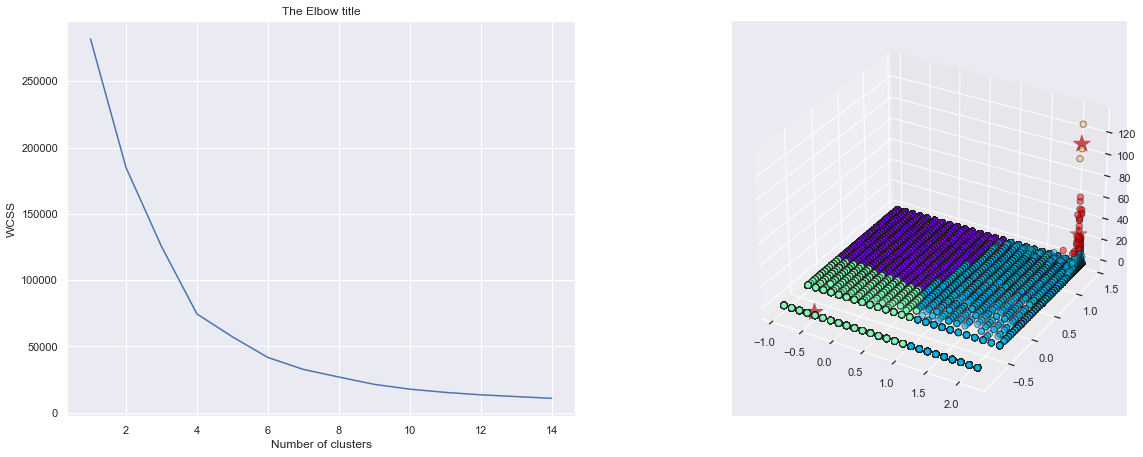

In [59]:
kmeans_df_cluster_df4 = execute_kmeans(df, ['Number of Versions', 'Average Rating', 'Rating Count'], 5)

In [60]:
kmeans_df_cluster_df4['cluster'].value_counts()

2    49361
0    27275
1    17303
4       37
3        3
Name: cluster, dtype: int64

In [61]:
kmeans_df_cluster_df4.groupby(by='cluster').min()

Number of Versions  Average Rating  Rating Count
cluster                                                  
0                         1             2.2             1
1                        13             0.0             0
2                         1             0.0             0
3                        25             4.7       1400000
4                        25             4.0        222800

In [62]:
kmeans_df_cluster_df4.groupby(by='cluster').max()

Number of Versions  Average Rating  Rating Count
cluster                                                  
0                        15             5.0         26700
1                        25             5.0        213300
2                        16             2.3          1500
3                        25             4.8       1800000
4                        25             4.9        899500

#### CLASSIFICATION MODEL

##### Rating count is a good variable to determine the average rating based on correlation

In [63]:
target_attributes = ['Price Category Ord', 'Rating Count Range Ord', 'Number of Versions', 'Age Rating Ord', 
                     'InApp Purchase Ord', 'is_english_supported Ord', 'is_available_in_multiple_langs Ord',
                     'Download Type Ord', 'App Type Ord', 'is_privacy_data_collected Ord', 'is_app_ever_updated Ord',
                     'is_updated_this_year Ord' ]

In [64]:
def create_ordinal_fields(df):
    age_rating_map = {'4+' : 3, '9+' : 2, '12+' : 1, '17+' : 0 }
    app_grading_map = {'EXCELLENT' : 4, 'VERY GOOD' : 3, 'GOOD' : 2, 'FAIR' : 1, 'BAD' : 0 }
    rating_count_map = {'0' : 0, '1+' : 1, '5+' : 2, '10+' : 3, '50+' : 4, '100+' : 5, '500+' : 6, '1,000+' : 7,
                       '5,000+' : 8, '10,000+' : 9, '50,000+' : 10, '100,000+' : 11, '500,000+' : 12, '1,000,000+': 13}
    price_map = {np.nan : 0, 'None' : 0, '0+' : 1, '1+' : 1, '5+' : 2, '10+' : 3, '50+' : 4, '100+' : 5, '500+' : 6}
    inapp_purchase_map = {True : 1, False : 0}
    service_type_map = {'PAID' : 1, 'FREE' : 0}
    app_type_map = {'MEDICAL' : 1, 'HEALTH AND FITNESS' : 0}
    english_supported_map = {True : 1, False : 0}
    available_in_multiple_langs_map = {True : 1, False : 0}
    privacy_data_collected_map = {True : 1, False : 0}
    app_ever_updated_map = {True : 1, False : 0}
    updated_this_year_map = {True : 1, False : 0}
    df['Age Rating Ord'] = df['Age Rating'].replace(age_rating_map)
    df['InApp Purchase Ord'] = df['InApp Purchase'].replace(inapp_purchase_map)
    df['is_english_supported Ord'] = df['is_english_supported'].replace(english_supported_map)
    df['is_available_in_multiple_langs Ord'] = df['is_available_in_multiple_langs'].replace(available_in_multiple_langs_map)
    df['is_privacy_data_collected Ord'] = df['is_privacy_data_collected'].replace(privacy_data_collected_map)
    df['is_app_ever_updated Ord'] = df['is_app_ever_updated'].replace(app_ever_updated_map)
    df['is_updated_this_year Ord'] = df['is_updated_this_year'].replace(updated_this_year_map)
    df['App Grade Ord'] = df['App Grade'].replace(app_grading_map)
    df['Download Type Ord'] = df['Download Type'].replace(service_type_map)
    df['Rating Count Range Ord'] = df['Rating Count Range'].replace(rating_count_map)
    df['App Type Ord'] = df['App Type'].replace(app_type_map)
    df['Price Category Ord'] = df['Price Category'].replace(price_map)
    return df


In [65]:
updated_df = create_ordinal_fields(df.copy())

##### Heatmap showing correlation of features


In [66]:
def draw_heatmap(df):
    df_num = df[['Price Category Ord', 'Number of Versions', 'is_privacy_data_collected Ord',
                 'is_updated_this_year Ord', 'is_available_in_multiple_langs Ord', 'is_english_supported Ord',
                 'InApp Purchase Ord', 'is_app_ever_updated Ord',
                'Download Type Ord','Rating Count Range Ord', 'App Type Ord', 'Age Rating Ord', 'App Grade Ord']]
    ax = sbn.heatmap( df_num.corr(method='spearman'), cmap = 'rainbow', annot=True)
    fig = pyplot.gcf()
    fig.set_size_inches(18, 8)
    font = {'family': 'Times New Roman','color':  'black','weight': 'bold','size': 16}
    pyplot.xlabel('Correlation map for Ios dataset features', fontdict=font)

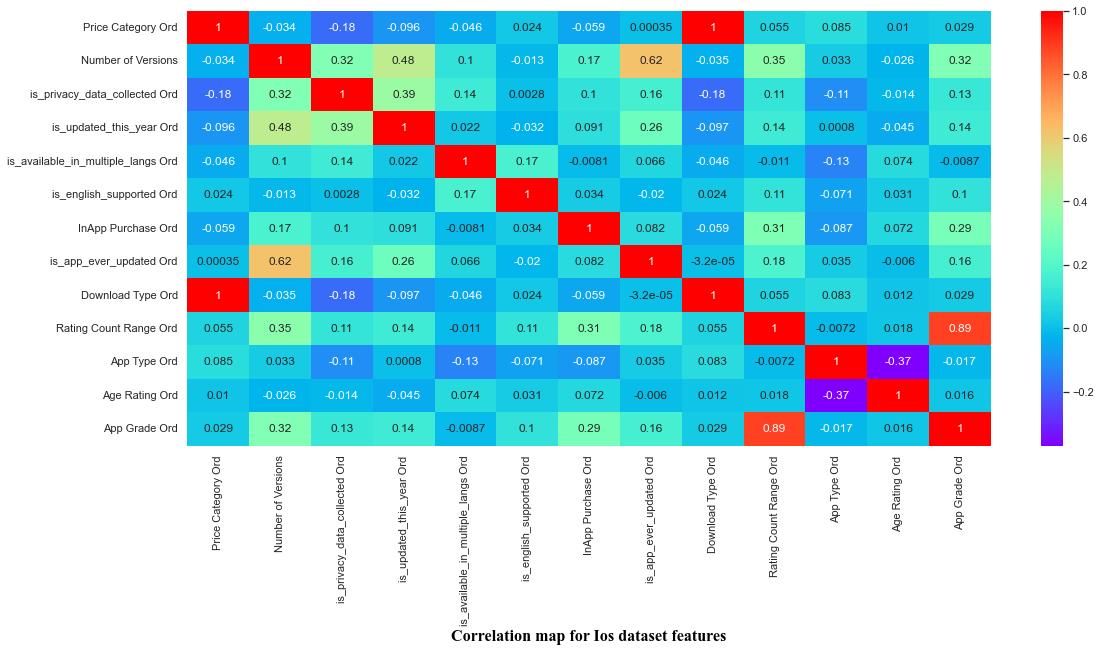

In [67]:
draw_heatmap(updated_df)

##### Use SelectKBest for feature selection

In [68]:
def get_top_features(no_of_features, X, Y):
    selector = SelectKBest(chi2, k="all") 
    selector.fit(X[target_attributes], Y)
    scores = (selector.scores_)
    argument_sort = list(np.argsort(scores))
    selected_attributes, selected_attribute_scores = [], []
    for i in range(len(target_attributes)-no_of_features,len(target_attributes)):
        value = argument_sort[i]
        selected_attributes.append(target_attributes[value])
        selected_attribute_scores.append(scores[value])
    return selected_attributes, selected_attribute_scores

In [69]:
selected_attributes, selected_attributes_score = get_top_features(7, 
                                            updated_df, 
                                             updated_df['App Grade Ord'])

In [70]:
selected_attributes_score

[153.48162461088143,
 388.99289488356226,
 1595.6396931723118,
 2288.491501741103,
 9267.104410419417,
 105384.22907204225,
 196545.3027506937]

In [71]:
selected_attributes

['is_available_in_multiple_langs Ord',
 'is_app_ever_updated Ord',
 'is_privacy_data_collected Ord',
 'is_updated_this_year Ord',
 'InApp Purchase Ord',
 'Number of Versions',
 'Rating Count Range Ord']

In [72]:
updated_df['App Grade'].value_counts()

BAD          55269
FAIR         32006
VERY GOOD     2573
EXCELLENT     2118
GOOD          2013
Name: App Grade, dtype: int64

Text(0.5, 0, 'SelectKBest for top 7 features (iOS)')

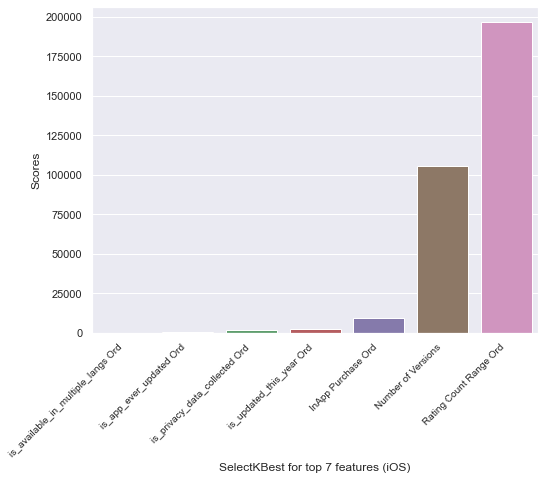

In [73]:
sbn.barplot(x=selected_attributes, y=selected_attributes_score)
set_plot_labels('Attributes', 'Scores', 'small')
fig = pyplot.gcf()
fig.set_size_inches(8, 6)
pyplot.xlabel('SelectKBest for top 7 features (iOS)')

In [74]:
filtered_attributes = ['Rating Count Range Ord', 'Number of Versions', 'is_privacy_data_collected Ord',
                     'InApp Purchase Ord', 'is_updated_this_year Ord']

In [75]:
updated_df['App Grade Ord'].value_counts()

0    55269
1    32006
3     2573
4     2118
2     2013
Name: App Grade Ord, dtype: int64

##### Split dataset into train and test data by using 25% as test and 75% as train dataset

In [76]:
X_train, X_test, y_train, y_test = train_test_split(updated_df[filtered_attributes],
                                                    updated_df['App Grade Ord'], test_size=0.25, random_state=42)

In [77]:
y_train.value_counts()

0    41352
1    24095
3     1951
4     1555
2     1531
Name: App Grade Ord, dtype: int64

##### Oversample train data becuase of imbalance in the dataset

In [78]:
def oversample_train_data(X_train, y_train):
    oversampler = SMOTE()
    oversampled_df_X, oversampled_df_Y = oversampler.fit_resample(X_train, y_train)
    return oversampled_df_X, oversampled_df_Y

In [79]:
oversampled_df_X, oversampled_df_Y = oversample_train_data(X_train, y_train)

##### Evaluation of four different classifiers (XGBoost, RandomForest, LogisticRegression, Naive Bayes)

In [80]:
def evaluate_and_get_classification_report(clf, train_X, train_Y, test_X, test_Y):
    print(f'============ Model {type(clf)} ====================')
    fitted_model = clf.fit(train_X,train_Y)
    print('Training score for => ', fitted_model.score(train_X,train_Y))
    y_pred = fitted_model.predict(test_X)
    print('Validation accuracy for => ', fitted_model.score(test_X, test_Y))
    target_names = ['BAD','FAIR','GOOD', 'VERY GOOD', 'EXCELLENT']
    print('Classification Report Summary')
    print(classification_report(test_Y, y_pred, target_names=target_names))
    print(f'====================================================')

In [81]:
clfs = [GaussianNB(), LogisticRegression(max_iter=1500), XGBClassifier(),RandomForestClassifier()]

In [82]:
for clf in clfs:
    evaluate_and_get_classification_report(clf, oversampled_df_X[filtered_attributes], 
                                           oversampled_df_Y,X_test[filtered_attributes], y_test )

============ Model <class 'sklearn.naive_bayes.GaussianNB'> ====================
Training score for =>  0.8050203134068485
Validation accuracy for =>  0.7738667801659928
Classification Report Summary
              precision    recall  f1-score   support

         BAD       0.81      0.89      0.85     13917
        FAIR       0.75      0.55      0.63      7911
        GOOD       0.36      0.86      0.51       482
   VERY GOOD       0.73      0.92      0.81       622
   EXCELLENT       0.89      0.85      0.87       563

    accuracy                           0.77     23495
   macro avg       0.71      0.81      0.73     23495
weighted avg       0.78      0.77      0.77     23495

============ Model <class 'sklearn.linear_model._logistic.LogisticRegression'> ====================
Training score for =>  0.8985732249951635
Validation accuracy for =>  0.9316875931049159
Classification Report Summary
              precision    recall  f1-score   support

         BAD       1.00      0.90    